In [1]:
import pandas as pd

# Calculating Complexity for Chameleon Chess

This script will calculate the game tree complexity of the game chameleon chess.

The complexity of a turn-based board game can be calculated with: $b^d$. $b$ is the branching factor, which is the usual number of moves a player could perform on a turn. $d$ is the depth, which is the usual length of a game (the total number of moves performed by all players).

For that purpose, a series of games were played by the computer player (maxN). There were games played with two, three and four players. The script to play the games is `src/branching-factor-and-depth.ts`. The results were stored to `data/branching-factor-and-depth.csv`.

In order to simulate different levels of experience in playing and to prevent all the games to be played in exactly then same manner, a random component was used. That means that there was a certain chance, that a random move was chosen, instead of one by the maxN algorithm. Some games were played with 1%, 10% and 20% chance for a random move.

Let's load the results from the games and have look on the data.

In [2]:
raw_data = pd.read_csv('../data/b-and-d.csv')
raw_data

,numOfPlayers,chanceOfRandom,branchingFactorAvg,branchingFactorMedian,depth
0,2,0.10,13.736842,13.0,19
1,2,0.10,14.694444,13.5,36
2,2,0.10,17.366667,20.5,30
3,2,0.10,8.183333,2.0,120
4,2,0.10,23.550000,23.0,20
...,...,...,...,...,...
895,4,0.05,16.909091,13.0,44
896,4,0.05,15.862069,13.0,58
897,4,0.05,15.944444,13.0,54
898,4,0.05,18.454545,17.0,55


The attributes 'numOfPlayers' and 'chanceOfRandom' encode the settings of the particular game.

'branchingFactorAvg', 'branchingFactorMedian' and 'depth' are our target attributes.

Let's check, how our target values are distributed.

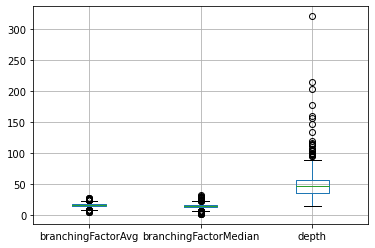

In [3]:
raw_data.loc[:,['branchingFactorAvg','branchingFactorMedian','depth']].plot.box(grid='True')

There are some outliers in the 'depth' property. When the game is gettings near the end, circles may occur. That means that both remaining players are basically 'dancing around each other' and no one gets a chance to beat the other. In reality with human players this never occurs (personal experience). The random moves should also prevent these circles. But it seems there are some cases, where a circular game took place.

Lets remove these ones from the data!

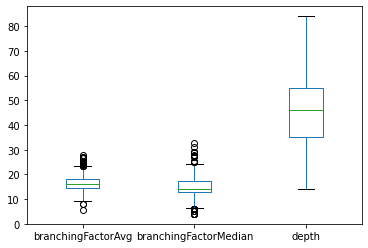

In [15]:
data = raw_data[raw_data.depth < 85]
data.loc[:,['branchingFactorAvg','branchingFactorMedian','depth']].plot.box()

Now we have a more realistic data set.

There seems to be another outlier in the branching factor, but this is not unusual. By playing skillfully a player might have several pawns in very good positions (e.g. all pawns have the role 'queen'), thus causing the branching factor to skyrocket for this turn.

The data set is cleaned up. Let's get into the analysis.

In [16]:
data_p2 = data[data.numOfPlayers == 2]
data_p3 = data[data.numOfPlayers == 3]
data_p4 = data[data.numOfPlayers == 4]

data_p2_1 = data[(data.numOfPlayers == 2) & (data.chanceOfRandom == 0.05)]
data_p3_1 = data[(data.numOfPlayers == 3) & (data.chanceOfRandom == 0.05)]
data_p4_1 = data[(data.numOfPlayers == 4) & (data.chanceOfRandom == 0.05)]

data_p2_10 = data[(data.numOfPlayers == 2) & (data.chanceOfRandom == 0.1)]
data_p3_10 = data[(data.numOfPlayers == 3) & (data.chanceOfRandom == 0.1)]
data_p4_10 = data[(data.numOfPlayers == 4) & (data.chanceOfRandom == 0.1)]

data_p2_20 = data[(data.numOfPlayers == 2) & (data.chanceOfRandom == 0.2)]
data_p3_20 = data[(data.numOfPlayers == 3) & (data.chanceOfRandom == 0.2)]
data_p4_20 = data[(data.numOfPlayers == 4) & (data.chanceOfRandom == 0.2)]

## Analysis of Branching Factor and Depth

In [17]:
table = [
    [
        '', data_p2_1.branchingFactorAvg.mean(),  data_p2_1.branchingFactorMedian.mean(),  data_p2_1.depth.mean(),
        '', data_p2_10.branchingFactorAvg.mean(), data_p2_10.branchingFactorMedian.mean(), data_p2_10.depth.mean(),
        '', data_p2_20.branchingFactorAvg.mean(), data_p2_20.branchingFactorMedian.mean(), data_p2_20.depth.mean(),
        '', data_p2.branchingFactorAvg.mean(),    data_p2.branchingFactorMedian.mean(),    data_p2.depth.mean(),
    ],[
        '', data_p3_1.branchingFactorAvg.mean(),  data_p3_1.branchingFactorMedian.mean(),  data_p3_1.depth.mean(),
        '', data_p3_10.branchingFactorAvg.mean(), data_p3_10.branchingFactorMedian.mean(), data_p3_10.depth.mean(),
        '', data_p3_20.branchingFactorAvg.mean(), data_p3_20.branchingFactorMedian.mean(), data_p3_20.depth.mean(),
        '', data_p3.branchingFactorAvg.mean(),    data_p3.branchingFactorMedian.mean(),    data_p3.depth.mean(),
    ],[
        '', data_p4_1.branchingFactorAvg.mean(),  data_p4_1.branchingFactorMedian.mean(),  data_p4_1.depth.mean(),
        '', data_p4_10.branchingFactorAvg.mean(), data_p4_10.branchingFactorMedian.mean(), data_p4_10.depth.mean(),
        '', data_p4_20.branchingFactorAvg.mean(), data_p4_20.branchingFactorMedian.mean(), data_p4_20.depth.mean(),
        '', data_p4.branchingFactorAvg.mean(),    data_p4.branchingFactorMedian.mean(),    data_p4.depth.mean(),
    ]
]
pd.DataFrame(table, index=['2 Players','3 Players','4 Players'],columns=['| 5%:','bAv','bMe','d','| 10%:','bAv','bMe','d','| 20%:','bAv','bMe','d','| all:','bAv','bMe','d']).round(0)

,| 5%:,bAv,bMe,d,| 10%:,bAv,bMe,d,| 20%:,bAv,bMe,d,| all:,bAv,bMe,d
2 Players,,17.0,15.0,33.0,,18.0,17.0,31.0,,17.0,15.0,31.0,,17.0,16.0,32.0
3 Players,,16.0,16.0,47.0,,16.0,15.0,49.0,,16.0,15.0,51.0,,16.0,15.0,49.0
4 Players,,17.0,14.0,54.0,,16.0,14.0,57.0,,16.0,14.0,57.0,,16.0,14.0,56.0


Branching factor (b) and depth (d) stay fairly consistent even for different percentages of random moves.

However, especially the depth differs depending on the number of players. This is not surprising, because the number of players must have an effect on the overall length of a game. The more players, the more moves are made. Double the number of players also doubles the game length, which seems plausible.

Now, we can finally calculate the actual complexity. The calculation will be done for each player constellation separately.

## Final Result

In [18]:
def calcComplexity(b,d):
    return b ** d

table2 = [
    [
        calcComplexity(data_p2.branchingFactorAvg.mean(), data_p2.depth.mean()),
        calcComplexity(data_p3.branchingFactorAvg.mean(), data_p3.depth.mean()),
        calcComplexity(data_p4.branchingFactorAvg.mean(), data_p4.depth.mean()),
        calcComplexity(data.branchingFactorAvg.mean(), data.depth.mean()),
    ]
]
pd.DataFrame(table2, index=['complexity'], columns=['2 Players','3 Players','4 Players','total'])

,2 Players,3 Players,4 Players,total
complexity,1.080551e+39,1.162976e+59,3.514075e+67,1.320642e+55


Chameleon Chess has a high complexity spanning from $10^{25}$ for a two player game, up to almost $10^{52}$ in a four player game.